<a href="https://colab.research.google.com/github/armarmarm927/dl_lecture_competition_pub/blob/main/sparkproto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch import optim
import torch.nn.init as init
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset,DataLoader
from torch.optim import lr_scheduler
import torchvision.datasets as dsets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
batch_size = 100
train_data = dsets.CIFAR10(root='./tmp/cifar-10',train=True,download=True,transform=transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),transforms.RandomRotation(degrees=(-180, 180)),transforms.RandomCrop(32, padding=(4, 4, 4, 4), padding_mode='constant'),transforms.ToTensor(),transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]),transforms.RandomErasing(p=0.5,scale=(0.02,0.33),ratio=(0.3,3.3),value=0,inplace=False)]))
train_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_data = dsets.CIFAR10(root='./tmp/cifar-10',train=False,download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])]))
test_loader = DataLoader(test_data,batch_size=batch_size,shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 12.3MB/s]


Extracting ./tmp/cifar-10/cifar-10-python.tar.gz to ./tmp/cifar-10
Files already downloaded and verified


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model_ft = models.resnet50(pretrained=True)
model_ft.fc = nn.Linear(model_ft.fc.in_features,10)
net = model_ft.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 178MB/s]


In [5]:
criterion =nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.05,momentum=0.9,weight_decay=0.00005)
scheduler = lr_scheduler.LambdaLR(optimizer,lr_lambda=lambda epoch:0.95**epoch)

In [6]:
loss,epoch_loss,count = 0,0,0
acc_list = []
loss_list = []
for i in range(50):
  net.train()
  for j,data in enumerate(train_loader,0):
    optimizer.zero_grad()
    inputs,labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = net(inputs)

    loss = criterion(outputs,labels)

    loss.backward()
    optimizer.step()

    epoch_loss +=loss
    count += 1

  print('%depoch:mean_loss:%.3f\n'%(i+1,epoch_loss/count))
  loss_list.append(epoch_loss/count)

  epoch_loss = 0
  count = 0
  correct = 0
  total = 0
  accuracy = 0.0

  net.eval()
  for j,data in enumerate(test_loader,0):
    inputs,labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = net(inputs)

    _,predicted = torch.max(outputs.data,1)

    correct += (predicted == labels).sum()
    total += batch_size

  accuracy = 100.*correct / total
  acc_list.append(accuracy)
  print('epoch:%d Accuracy(%d/%d):%f'%(i+1,correct,total,accuracy))
  torch.save(net.state_dict(),'Weight'+str(i+1))
  scheduler.step()

1epoch:mean_loss:1.997

epoch:1 Accuracy(2865/10000):28.650000
2epoch:mean_loss:2.030

epoch:2 Accuracy(3579/10000):35.790001
3epoch:mean_loss:1.897

epoch:3 Accuracy(3821/10000):38.209999
4epoch:mean_loss:1.783

epoch:4 Accuracy(4133/10000):41.329998
5epoch:mean_loss:1.703

epoch:5 Accuracy(4419/10000):44.189999
6epoch:mean_loss:1.636

epoch:6 Accuracy(4568/10000):45.680000
7epoch:mean_loss:1.597

epoch:7 Accuracy(4865/10000):48.649998
8epoch:mean_loss:1.620

epoch:8 Accuracy(4889/10000):48.889999
9epoch:mean_loss:1.497

epoch:9 Accuracy(5440/10000):54.399998
10epoch:mean_loss:1.474

epoch:10 Accuracy(5397/10000):53.969997
11epoch:mean_loss:1.515

epoch:11 Accuracy(5354/10000):53.539997
12epoch:mean_loss:1.463

epoch:12 Accuracy(5305/10000):53.049999
13epoch:mean_loss:1.430

epoch:13 Accuracy(5535/10000):55.349998
14epoch:mean_loss:1.412

epoch:14 Accuracy(5450/10000):54.500000
15epoch:mean_loss:1.398

epoch:15 Accuracy(5791/10000):57.910000
16epoch:mean_loss:1.380

epoch:16 Accuracy(

KeyboardInterrupt: 

In [7]:
loss, epoch_loss, count = 0, 0, 0
acc_list = []
loss_list = []

for i in range(20):
    net.train()
    for j, data in enumerate(train_loader, 0):
        optimizer.zero_grad()
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        count += 1

    print('%depoch: mean_loss: %.3f' % (i+1, epoch_loss/count))
    loss_list.append(epoch_loss/count)
    epoch_loss = 0
    count = 0
    correct = 0
    total = 0
    accuracy = 0.0

    # 混同行列用のリスト
    y_true = []
    y_pred = []

    net.eval()
    with torch.no_grad():
        for j, data in enumerate(test_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)

            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            # 混同行列用データ保存
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = 100. * correct / total
    acc_list.append(accuracy)
    print('epoch:%d Accuracy(%d/%d): %.2f%%' % (i+1, correct, total, accuracy))

    # 混同行列の計算と表示
    cm = confusion_matrix(y_true, y_pred)
    print(f'Confusion Matrix (Epoch {i+1}):')
    print(cm)

    torch.save(net.state_dict(), 'Weight' + str(i+1))
    scheduler.step()


1epoch: mean_loss: 2.300
epoch:1 Accuracy(2110/10000): 21.10%
Confusion Matrix (Epoch 1):
[[443   0   7   1  42  36  22   6 380  63]
 [131   6   6   2  22 116  35  12 498 172]
 [ 89   1  32   3 167 162 215  23 213  95]
 [ 26   5  17   0 133 255 102  21 240 201]
 [ 36   2  36   0 277 149 281  21 137  61]
 [ 22   6  10   3 115 246  98  21 304 175]
 [  6   2  28   0 213 218 339  24  84  86]
 [ 20   3  25   0 146 227 112  19 217 231]
 [311   1   5   0  46  31   6   3 501  96]
 [114   3   4   4  23 107  18  10 470 247]]
2epoch: mean_loss: 2.073
epoch:2 Accuracy(2359/10000): 23.59%
Confusion Matrix (Epoch 2):
[[544   4  26  51  14  57  13  65 206  20]
 [201  86  18  40   1 141  54  58 308  93]
 [141  15 163  55 222 110  93  98  87  16]
 [ 59  39 100  94  43 161 157 174 121  52]
 [ 63   5 198  54 319  70 115 109  50  17]
 [ 55  28  94  88  39 237 128 119 150  62]
 [ 15   3 221  62 256  57 215 123  36  12]
 [ 59  18 126 100  47  98  82 304 115  51]
 [476  23  16  60   2  53  11  49 274  36]
 [

In [8]:
print(acc_list)

[21.1, 23.59, 27.94, 30.4, 33.12, 32.16, 34.26, 37.45, 36.37, 36.34, 38.64, 40.49, 41.7, 41.35, 39.82, 44.11, 44.58, 43.93, 44.6, 43.33]


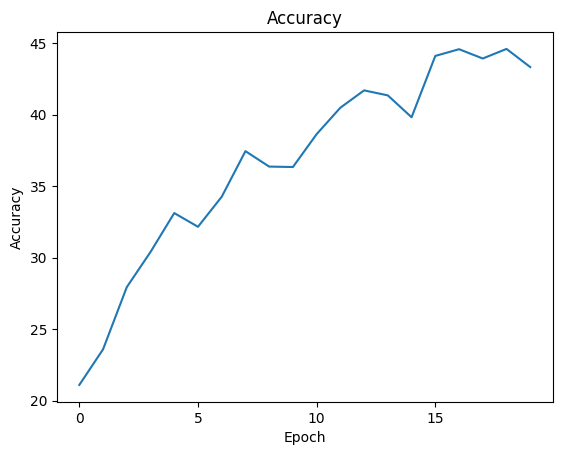

In [10]:
plt.plot(acc_list)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,20,5))
plt.ylabel('Accuracy')
plt.show()